In [1]:
import os
import re
import pandas as pd
import numpy as np

WhatsAppChat_file = 'C:\\Users\\Gautham\\Downloads\\Datasets\\WhatsappDataAnalysis\\My_School_data.txt'

if os.path.exists(WhatsAppChat_file):
        file_data = open(WhatsAppChat_file,'r', encoding="utf8")
        txtstr = file_data.read()

# Get date
date_regex = re.compile(r'(\d+/\d+/\d+)')
date = date_regex.findall(txtstr)

In [2]:
# Get time
time_regex=re.compile(r'\d{1,2}:\d{2} AM|\d{1,2}:\d{2} PM')
time=time_regex.findall(txtstr)

In [3]:
# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(txtstr)

In [4]:
# Get Message
message_regex=re.compile(r'([^:]+):?$')
me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(txtstr)
message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]

In [5]:
# Zip date,time,user,message together
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([w,x,y,z])

In [6]:
# Create DataFrame from WhatsApp content
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))
df.head()

,Date,Time,User,Message
0,9/17/17,11:39 PM,Ram Kumar K Old,Iyo arikuthe
1,9/17/17,11:39 PM,Saravanan New,U people go n enjoy..tats OK for me
2,9/17/17,11:40 PM,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...
3,9/18/17,9:23 PM,Gautham BGV O+,Ena da ellarum ipadi panringa
4,9/18/17,9:24 PM,Raj Loyola,Namba polam da


In [7]:
# Let's clean our Message
df['Message']=df['Message'].str.replace('\'(.*?): ','')
df.head()

,Date,Time,User,Message
0,9/17/17,11:39 PM,Ram Kumar K Old,Iyo arikuthe
1,9/17/17,11:39 PM,Saravanan New,U people go n enjoy..tats OK for me
2,9/17/17,11:40 PM,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...
3,9/18/17,9:23 PM,Gautham BGV O+,Ena da ellarum ipadi panringa
4,9/18/17,9:24 PM,Raj Loyola,Namba polam da


In [8]:
# Get Year from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df.head()

,Date,Time,User,Message,Year
0,2017-09-17,11:39 PM,Ram Kumar K Old,Iyo arikuthe,2017
1,2017-09-17,11:39 PM,Saravanan New,U people go n enjoy..tats OK for me,2017
2,2017-09-17,11:40 PM,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017
3,2017-09-18,9:23 PM,Gautham BGV O+,Ena da ellarum ipadi panringa,2017
4,2017-09-18,9:24 PM,Raj Loyola,Namba polam da,2017


In [9]:
# Get Month from Date
df['Month']=df['Date'].dt.month
df.head()

,Date,Time,User,Message,Year,Month
0,2017-09-17,11:39 PM,Ram Kumar K Old,Iyo arikuthe,2017,9
1,2017-09-17,11:39 PM,Saravanan New,U people go n enjoy..tats OK for me,2017,9
2,2017-09-17,11:40 PM,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9
3,2017-09-18,9:23 PM,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9
4,2017-09-18,9:24 PM,Raj Loyola,Namba polam da,2017,9


In [10]:
# Get Day from Date
df['Day']=df['Date'].dt.day
df.head()

,Date,Time,User,Message,Year,Month,Day
0,2017-09-17,11:39 PM,Ram Kumar K Old,Iyo arikuthe,2017,9,17
1,2017-09-17,11:39 PM,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17
2,2017-09-17,11:40 PM,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17
3,2017-09-18,9:23 PM,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18
4,2017-09-18,9:24 PM,Raj Loyola,Namba polam da,2017,9,18


In [11]:
# Get Hours of the Day

df['Time'] = pd.to_datetime(df['Time'])
df['Hours']=df.Time.apply(lambda x: x.hour)
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21


In [12]:
# Message words
df['Words'] = df['Message'].str.strip().str.split('[\W_]+')
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23,"[Iyo, arikuthe]"
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23,"[U, people, go, n, enjoy, tats, OK, for, me]"
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23,"[Guys, tour, plan, maximum, I, ll, not, be, ab..."
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21,"[Ena, da, ellarum, ipadi, panringa]"
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21,"[Namba, polam, da]"


In [13]:
# Word length
df['Word Length'] = df['Words'].apply(len)
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23,"[Iyo, arikuthe]",2
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23,"[U, people, go, n, enjoy, tats, OK, for, me]",9
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23,"[Guys, tour, plan, maximum, I, ll, not, be, ab...",12
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21,"[Ena, da, ellarum, ipadi, panringa]",5
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21,"[Namba, polam, da]",3


In [14]:
# Get the Length of Message
df['Message Characters'] = df['Message'].map(str).apply(len)-3
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length,Message Characters
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23,"[Iyo, arikuthe]",2,9
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23,"[U, people, go, n, enjoy, tats, OK, for, me]",9,32
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23,"[Guys, tour, plan, maximum, I, ll, not, be, ab...",12,47
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21,"[Ena, da, ellarum, ipadi, panringa]",5,26
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21,"[Namba, polam, da]",3,11


In [15]:
# Get Media shared in the Message
df['Media']=df['Message'].str.contains('<Media omitted>')
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length,Message Characters,Media
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23,"[Iyo, arikuthe]",2,9,False
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23,"[U, people, go, n, enjoy, tats, OK, for, me]",9,32,False
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23,"[Guys, tour, plan, maximum, I, ll, not, be, ab...",12,47,False
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21,"[Ena, da, ellarum, ipadi, panringa]",5,26,False
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21,"[Namba, polam, da]",3,11,False


In [16]:
# Save the DataFrame to a csv file
df.to_csv("whatsapp.csv")

In [17]:
df.head()

,Date,Time,User,Message,Year,Month,Day,Hours,Words,Word Length,Message Characters,Media
0,2017-09-17,2019-03-07 23:39:00,Ram Kumar K Old,Iyo arikuthe,2017,9,17,23,"[Iyo, arikuthe]",2,9,False
1,2017-09-17,2019-03-07 23:39:00,Saravanan New,U people go n enjoy..tats OK for me,2017,9,17,23,"[U, people, go, n, enjoy, tats, OK, for, me]",9,32,False
2,2017-09-17,2019-03-07 23:40:00,Ram Kumar K Old,Guys tour plan maximum I'll not be able to mak...,2017,9,17,23,"[Guys, tour, plan, maximum, I, ll, not, be, ab...",12,47,False
3,2017-09-18,2019-03-07 21:23:00,Gautham BGV O+,Ena da ellarum ipadi panringa,2017,9,18,21,"[Ena, da, ellarum, ipadi, panringa]",5,26,False
4,2017-09-18,2019-03-07 21:24:00,Raj Loyola,Namba polam da,2017,9,18,21,"[Namba, polam, da]",3,11,False


In [18]:
print(df.shape[0])

39809


In [19]:
print(df.describe())

               Year         Month           Day         Hours   Word Length  \
count  39809.000000  39809.000000  39809.000000  39809.000000  39809.000000   
mean    2017.728478      7.293552     16.167198     15.611972      3.637720   
std        0.553056      3.526554      9.016337      5.821978      3.144286   
min     2016.000000      1.000000      1.000000      0.000000      1.000000   
25%     2017.000000      4.000000      8.000000     11.000000      2.000000   
50%     2018.000000      8.000000     17.000000     17.000000      3.000000   
75%     2018.000000     10.000000     24.000000     21.000000      4.000000   
max     2019.000000     12.000000     31.000000     23.000000     89.000000   

       Message Characters  
count        39809.000000  
mean            14.333216  
std             18.289541  
min             -2.000000  
25%              3.000000  
50%             11.000000  
75%             19.000000  
max            334.000000  


In [20]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Hours',
       'Words', 'Word Length', 'Message Characters', 'Media'],
      dtype='object')


In [21]:
days = df.groupby('Date')['Date'].count()
print(days)

Date
2016-09-15      1
2017-09-17      3
2017-09-18     20
2017-09-19    324
2017-09-20     91
2017-09-21     99
2017-09-22     11
2017-09-23     39
2017-09-24    157
2017-09-25    286
2017-09-26    269
2017-09-27    372
2017-09-28    347
2017-09-29    165
2017-09-30     87
2017-10-01     36
2017-10-02     47
2017-10-03    142
2017-10-04     63
2017-10-05    182
2017-10-06     84
2017-10-07     48
2017-10-08     68
2017-10-09     21
2017-10-10     87
2017-10-11    209
2017-10-12    115
2017-10-13    187
2017-10-14    143
2017-10-15    295
             ... 
2019-01-25      9
2019-01-26      9
2019-01-27     38
2019-01-28     48
2019-01-29     15
2019-01-30     12
2019-01-31     13
2019-02-01     19
2019-02-02      3
2019-02-03     38
2019-02-04      8
2019-02-06      8
2019-02-07     43
2019-02-08     27
2019-02-09      8
2019-02-10     13
2019-02-11      1
2019-02-12     42
2019-02-13      5
2019-02-14     57
2019-02-21      2
2019-02-22      1
2019-02-23     25
2019-02-24     17
2019-

In [22]:
users = df.groupby('User')['User'].count()
print(users)

User
 3                                                                                                                                                                                                                        1
 4                                                                                                                                                                                                                        1
 Android developer - to get an interview they need to finish this task                                                                                                                                                    1
 Business News - https                                                                                                                                                                                                    1
 Colonel's daughter in Shimla - https                                                                              

In [23]:
message=df.groupby('User')['Message'].count()
print(message)

User
 3                                                                                                                                                                                                                        1
 4                                                                                                                                                                                                                        1
 Android developer - to get an interview they need to finish this task                                                                                                                                                    1
 Business News - https                                                                                                                                                                                                    1
 Colonel's daughter in Shimla - https                                                                              

In [24]:
year = df.groupby('Year')['Year'].count()
print(year)

Year
2016        1
2017    12957
2018    24701
2019     2150
Name: Year, dtype: int64


In [25]:
month = df.groupby(['Month'])['Month'].count()
print(month)

Month
1     2638
2     2235
3     4325
4     1977
5     2109
6     2605
7     1974
8     2631
9     4321
10    6182
11    5136
12    3676
Name: Month, dtype: int64


In [26]:
year_month = df.groupby(['Year','Month'])['Month'].count()
print(month)

Month
1     2638
2     2235
3     4325
4     1977
5     2109
6     2605
7     1974
8     2631
9     4321
10    6182
11    5136
12    3676
Name: Month, dtype: int64


In [27]:
year_day = df.groupby(['Year','Day'])['Day'].count()
print(year_day)

Year  Day
2016  15       1
2017  1      399
      2      689
      3      349
      4      265
      5      371
      6      290
      7      492
      8      267
      9      176
      10     438
      11     327
      12     527
      13     193
      14     169
      15     580
      16     178
      17     511
      18     294
      19     665
      20     289
      21     285
      22     342
      23     119
      24     281
      25     799
      26     751
      27     791
      28     557
      29     574
            ... 
2019  1       30
      2       53
      3       75
      4      192
      5       44
      6      136
      7       61
      8      123
      9      137
      10      76
      11      98
      12     163
      13      85
      14     119
      15     116
      16      33
      17      23
      18       1
      20      38
      21      46
      22      76
      23      55
      24      32
      25      41
      26      11
      27      50
      28     196
    

In [28]:
hours = df.groupby(['Hours'])['Hours'].count()
print(hours)

Hours
0     1103
1      164
2       86
3       55
4      117
5      172
6      379
7      841
8     1870
9     2040
10    1988
11    1785
12    1493
13    2178
14    2135
15    1756
16    1453
17    1818
18    2570
19    2699
20    1851
21    3559
22    4273
23    3424
Name: Hours, dtype: int64


In [29]:
char_length = df.groupby(['User'])['Message Characters'].sum()
print(char_length)

User
 3                                                                                                                                                                                                                         1
 4                                                                                                                                                                                                                        26
 Android developer - to get an interview they need to finish this task                                                                                                                                                    13
 Business News - https                                                                                                                                                                                                     7
 Colonel's daughter in Shimla - https                                                                          

In [30]:
word_length=df.groupby(['User'])['Word Length'].sum()
print(word_length)

User
 3                                                                                                                                                                                                                        1
 4                                                                                                                                                                                                                        5
 Android developer - to get an interview they need to finish this task                                                                                                                                                    4
 Business News - https                                                                                                                                                                                                    2
 Colonel's daughter in Shimla - https                                                                              

In [31]:
media = df.groupby(['Media'])['Media'].sum()
print(media)

Media
False       0.0
True     2893.0
Name: Media, dtype: float64


In [32]:
media_df = df[df['Media']==True]
media_per_user = media_df.groupby(['User','Media'])['Media'].count()
print(media_per_user)

User                    Media
 Gautham BGV O+         True     927
 Karthi Kottupalayam    True      18
 Magesh School          True     131
 NDTV https             True       1
 Prem Coumar            True     453
 Raj Loyola             True      29
 Ram Kumar K Old        True     171
 Saravanan New          True     185
 Shankar                True     100
 Suresh Kirumi          True     364
 V1                     True     512
 Vaithi Saravanan Frnd  True       1
tickets-https           True       1
Name: Media, dtype: int64


In [33]:
media_df=df[df['Media']==True]
media_per_month = media_df.groupby(['Year','Month','Media'])['Media'].count()
print(media_per_month)

Year  Month  Media
2017  9      True      49
      10     True     183
      11     True     196
      12     True      90
2018  1      True      87
      2      True      83
      3      True     302
      4      True     149
      5      True     129
      6      True     120
      7      True     117
      8      True     261
      9      True     275
      10     True     132
      11     True     113
      12     True     250
2019  1      True     289
      2      True      63
      3      True       5
Name: Media, dtype: int64


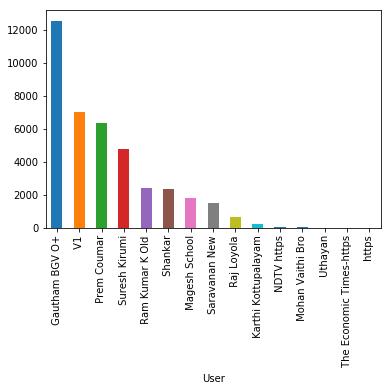

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

users=df.groupby('User')['User'].count().nlargest(15)
users.plot(kind="bar")

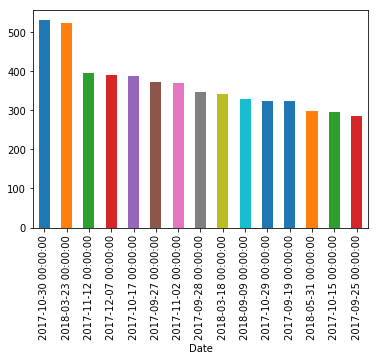

In [35]:
days=df.groupby('Date')['Date'].count().nlargest(15)
days.plot(kind="bar")

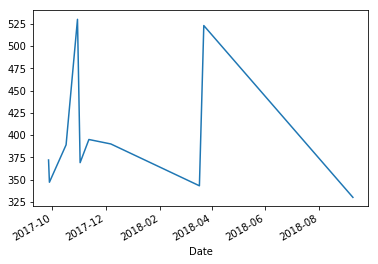

In [36]:
date=df.groupby('Date')['Date'].count().nlargest(10)
date.plot(kind="line")

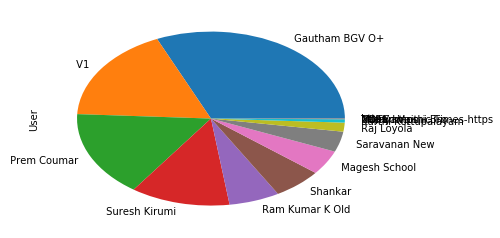

In [37]:
user=df.groupby('User')['User'].count().nlargest(15)
user.plot(kind="pie")

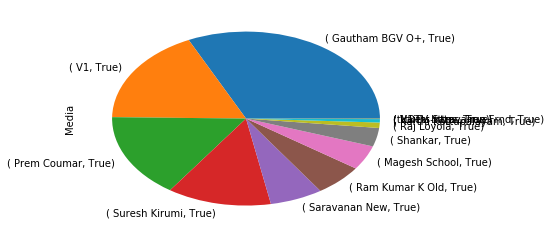

In [38]:
media_df=df[df['Media']==True]
media_per_user_group=media_df.groupby(['User','Media'])['Media'].count().nlargest(15)
media_per_user_group.plot(kind="pie")

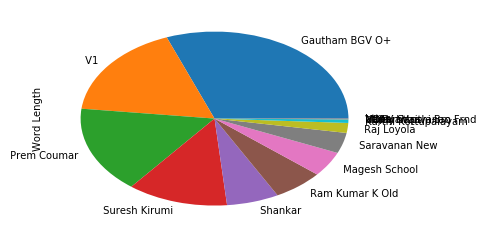

In [39]:
word_count=df.groupby(['User'])['Word Length'].sum().nlargest(15)
word_count.plot(kind="pie")

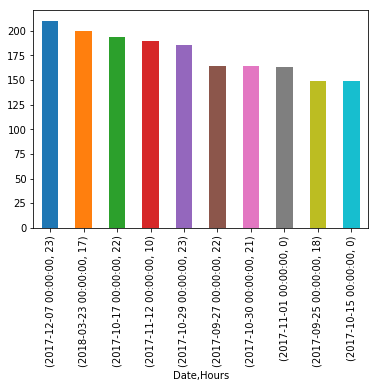

In [40]:
active_hour=df.groupby(['Date','Hours'])['Hours'].count().nlargest(10)
active_hour.plot(kind="bar")

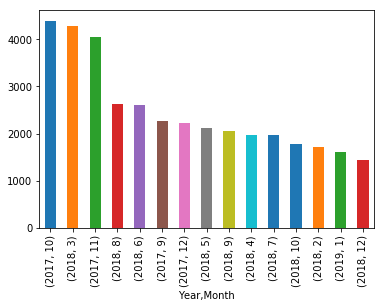

In [41]:
active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(15)
active_month.plot(kind="bar")

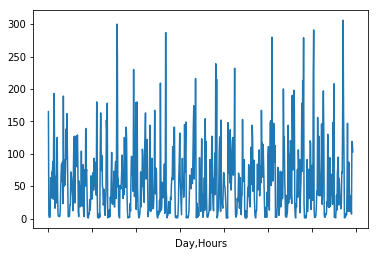

In [42]:
active_hour_line_group=df.groupby(['Day','Hours'])['Hours'].count()
active_hour_line_group.plot(kind="line")